# Setting up the Simple `TUM`

In [13]:
from phi.tf.flow import *  # Causes deprecation warnings with TF 1.15
import pylab
import numpy as np
from TUM_flow import TUM_flow
import scipy.interpolate as sc_interp

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


Building graph for frame 0
Building graph for frame 1
Building graph for frame 2
Building graph for frame 3
Building graph for frame 4
Building graph for frame 5
Building graph for frame 6
Building graph for frame 7
Building graph for frame 8
Building graph for frame 9
Done computing frames...


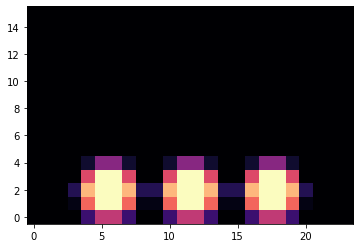

In [14]:
#Set parameters
params_08 = {'res': 8,
            'frames': 10,
            'optim_steps': 50
            }

#Initialize object and build graphs
flow_08 = TUM_flow(params_08)
flow_08.build_graphs()

pylab.imshow(np.concatenate(flow_08.session.run(flow_08.fluid.density).data[...,0], axis=1), origin='lower', cmap='magma')

In [15]:
#Set target, optimize
flow_08.set_target('tum/tum_08.png')
flow_08.train()

Initial loss: 5761.769531
Running optimization step 0. The first step sets up the adjoint graph.
Loss: 5761.769531
Running optimization step 1. 
Loss: 3969.559082
Running optimization step 2. 
Loss: 3380.034668
Running optimization step 3. 
Loss: 2995.718018
Running optimization step 4. 
Loss: 2692.199951
Running optimization step 5. 
Loss: 2477.242188
Running optimization step 6. 
Loss: 2338.828125
Running optimization step 7. 
Loss: 2231.664307
Running optimization step 8. 
Loss: 2135.584717
Running optimization step 9. 
Loss: 2048.040039
Running optimization step 10. 
Loss: 1971.614014
Running optimization step 11. 
Loss: 1901.210815
Running optimization step 12. 
Loss: 1835.770630
Running optimization step 13. 
Loss: 1774.353027
Running optimization step 14. 
Loss: 1716.124023
Running optimization step 15. 
Loss: 1663.865845
Running optimization step 16. 
Loss: 1621.314453
Running optimization step 17. 
Loss: 1584.426514
Running optimization step 18. 
Loss: 1547.894897
Running opti

In [16]:
#Get optimized velocities and densities
optimized_vel_08 = flow_08.get_optimized_velocities()
densities_08 = flow_08.get_densities()

Got optimized velocities.
Got densities.


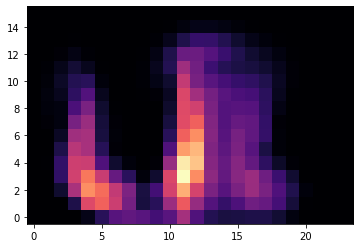

In [17]:
pylab.imshow(np.concatenate(flow_08.session.run(flow_08.fluid.density).data[...,0], axis=1), origin='lower', cmap='magma')

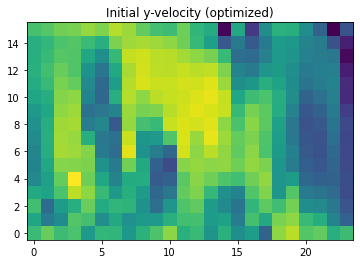

In [19]:
#Plot optimized velocity for step 0
pylab.title('Initial y-velocity (optimized)')
pylab.imshow(np.concatenate(optimized_vel_08[0].at_centers().data[...,0], axis=1), origin='lower')
pylab.show()

In [30]:
#pylab.imshow(np.concatenate(densities_08[8].data[...,0], axis=1), origin='lower', cmap='magma')
#pylab.show()

vel_16ip = math.upsample2x(optimized_vel_08[0].staggered_tensor())
#vel_16ip = StaggeredGrid(optimized_vel_08[0].staggered_tensor()).upsample2x().staggered_tensor()
#for state in optimized_vel_08:
#    vel_16ip.append(flow_08.fluid.state.copied_with(math.upsample2x(state.staggered_tensor())))


(1, 34, 50, 2)


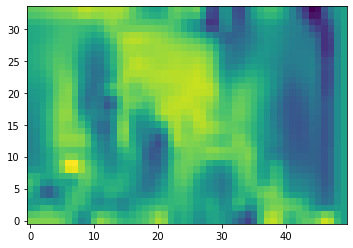

In [42]:
pylab.imshow(np.concatenate(vel_16ip[...,0], axis=1), origin='lower')
